## $\S$ 5.2.3. Example: Phoneme Recognition

In this example, we use splines to reduce flexibility rather than increase it; the application comes under the general heading of _functional_ modeling.

### The digitized data sampled from the continuous signal

In the top panel of FIGURE 5.5 are displayed a sample of 15 log-periodograms for each of the two phonemes "aa" and "ao" measured at 256 frequencies.

The goal is to classify a spoken phoneme.

The input feature is a vector $x$ of length 256, which we can think of as a vector of evaluations of a function $X(f)$ over a grid of frequencies $f$. In reality there is a continuous analog signal which is a function of frequency, and we have a sampled version of it.

In [9]:
"""FIGURE 5.5 (The top panel) The log-periodogram as a function of
frequency for 15 examples each of the phoneme "aa" and "ao" sampled from
total of 695 "aa"s and 1022 "ao"s. Each log-periodogram is measured at
256 uniformly spaced frequencies.
"""
%matplotlib inline
import scipy
import pandas as pd
import matplotlib.pyplot as plt

df_phoneme = pd.read_csv('../data/phoneme/phoneme.data', index_col=0)
print('A pandas DataFrame of size {} x {} '
      'has been loaded.'.format(*df_phoneme.shape))
# Select only "aa" and "ao" data
mask_aa_ao = scipy.any((df_phoneme['g'] == 'aa', df_phoneme['g'] == 'ao'),
                       axis=0)
df_phoneme_reduced = df_phoneme[mask_aa_ao]
print('The "aa" and "ao" dataset is of size '
      '{} x {},'.format(*df_phoneme_reduced.shape))
print(f'and consists of {sum(df_phoneme["g"] == "aa")} "aa"s '
      f'and {sum(df_phoneme["g"] == "ao")} "ao"s.')
mask_training = df_phoneme_reduced['speaker'].str.startswith('train')
df_phoneme_reduced.pop('speaker')
df_training = df_phoneme_reduced[mask_training]
df_test = df_phoneme_reduced[scipy.invert(mask_training)]
print('The training dataset is of size '
      '{} x {}, and'.format(*df_training.shape))
print('the test dataset is of size '
      '{} x {}.'.format(*df_training.shape))

A pandas DataFrame of size 4509 x 258 has been loaded.
The "aa" and "ao" dataset is of size 1717 x 258,
and consists of 695 "aa"s and 1022 "ao"s.
The training dataset is of size 1278 x 257, and
the test dataset is of size 1278 x 257.


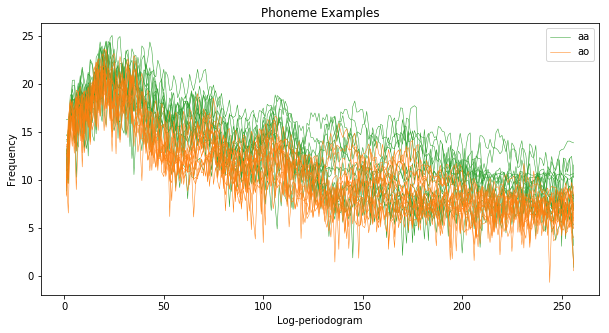

In [29]:
aa15 = df_phoneme_reduced[df_phoneme_reduced['g'] == 'aa'][:15]
ao15 = df_phoneme_reduced[df_phoneme_reduced['g'] == 'ao'][:15]
aa15.pop('g')
ao15.pop('g')
fig55 = plt.figure(55, figsize=(10, 10))
ax = fig55.add_subplot(1, 2, 1)
grid_x = range(1, 257)
plt_aa = ax.plot(grid_x, aa15.as_matrix().T,
                 color='C2', linewidth=.5, label='aa')
plt_ao = ax.plot(grid_x, ao15.as_matrix().T,
                 color='C1', linewidth=.5, label='ao')
ax.legend((plt_aa[0], plt_ao[0]), ('aa', 'ao'))
ax.set_xlabel('Log-periodogram')
ax.set_ylabel('Frequency')
ax.set_title('Phoneme Examples')
plt.show()

The gray lines in the lower panel of FIGURE 5.5 show the coefficients of a linear logistic regression model fit by maximum likelihood to a training sample of 1000 drawn from the total of 695 "aa"s and 1022 "ao"s. The coefficients are also plotted as a function of frequency, and in fact we can think of the model in terms of its continuous counterpart

\begin{equation}
\log\frac{\text{Pr}(\text{aa}|X)}{\text{Pr}(\text{ao}|X)} = \int X(f)\beta(f)df,
\end{equation}

which we approximate by

\begin{equation}
\sum_{j=1}^{256}X(f_j)\beta(f_j) = \sum_{j=1}^{256} x_j \beta_j.
\end{equation}

The coefficients compute a contrast functional, and will have appreciable values in regions of frequency where the log-periodograms differ between the two classes.

In [1]:
"""FIGURE 5.5 (The lower panel) The coefficients (as a function of frequency)
of a logistic regression fit to the data by maximum likelihood, using the 256
log-periodogram values as inputs."""
print('Under construction ...')

Under construction ...


### The spline for frequency coefficients

The gray curves are very rough. Since the input signals have fairly strong positive autocorrelation, this results in negative autocorrelation in the coefficients. In addition the sample size effectively provides only four observations per coefficients.

Applications such as this permit a natural regularization. We force the coefficients to vary smoothly as a function of frequency. The red curve in the lower panel of FIGURE 5.5 shows such a smooth coefficient curve fit to these data. We see that the lower frequencies offer the most discriminatory power. Not only does the smoothing allow easier interprettation of the contrast, it also produces a more accurate classifier.

In [4]:
"""FIGURE 5.5 (The lower panel) The red curve, a natural cubic spline of the coefficients
The coefficients are restricted to be smooth in the red curve, and are unrestricted in the
jagged gray curve."""
print('Under construction ...')

Under construction ...


### Implication and interpretation of the regression on digitized samples

This smooth red curve was obtained through a very simple use of natural cubic spline. We can represent the coefficient function as an expansion of splines

\begin{equation}
\beta(f) = \sum_{m=1}^M h_m(f)\theta_m.
\end{equation}

In practice this means that

\begin{equation}
\beta = \mathbf{H}\theta,
\end{equation}

where $\mathbf{H}$ is a $p \times M$ basis matrix of natural cubic splines, defined on the set of frequencies. Here we used $M=12$ basis functions, with knots uniformly placed over the integers $1,2,\cdots,256$ representing the frequencies.

Since

\begin{equation}
x^T\beta = x^T\mathbf{H}\theta,
\end{equation}

we can simply replace the input features $x$ by their _filtered_ versions

\begin{equation}
x^* = \mathbf{H}^Tx,
\end{equation}

and fit $\theta$ by linear logistic regression on the $x^*$. The red curve is thus

\begin{equation}
\hat\beta(f) = h(f)^T \hat\theta.
\end{equation}